# Python Project
### Stephanie Halsing
### December 15, 2023

### Step 1: Load Python libraries and read csv files.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv files into dataframes
salary_data = pd.read_csv("https://raw.githubusercontent.com/lowhornj/DSE5002/main/Python%20Project/Levels_Fyi_Salary_Data.csv")

cost_of_living = pd.read_csv("https://raw.githubusercontent.com/lowhornj/DSE5002/main/Python%20Project/cost_of_living.csv")

ds_salaries = pd.read_csv(r"https://raw.githubusercontent.com/lowhornj/DSE5002/main/Python%20Project/ds_salaries.csv")

country_codes = pd.read_excel("/Users/shalsing/Documents/DSE5002-main/Python Project/country_codes.xlsx")

### Step 2: Data wrangling - tidy, clean and organize data.

In [3]:
# Delete rank column
cost_of_living = cost_of_living.drop(columns = ['Rank'])

# Delete unnamed: 0 column
ds_salaries = ds_salaries.drop(columns = ['Unnamed: 0'])

In [4]:
# Rename city column to address
cost_of_living.columns = cost_of_living.columns.str.replace('City', 'Address')

# Split address column into city, state & country
cost_of_living[['City', 'State', 'Country']] = cost_of_living['Address'].str.split(',', expand = True)

# Fix country column that have the value 'None'
cost_of_living['Country'].fillna(cost_of_living['State'], inplace = True)

# Create new cost of living df & reorder columns
cost_of_living1 = cost_of_living[['Address', 'City', 'State', 'Country', 'Cost of Living Index', 'Rent Index', 
                                  'Cost of Living Plus Rent Index', 'Groceries Index']]

# Reset index
cost_of_living1 = cost_of_living1.reset_index(drop=True)

# Create new df - filter by United States
us_cost_of_living = cost_of_living1[(cost_of_living1['Country'] == ' United States')]

# Reset index
us_cost_of_living = us_cost_of_living.reset_index(drop=True)

In [5]:
# Create new df - filter ds_salaries by entry-level (EN), full-time (FT), job title 'Data Scientist'
en_ds_salaries = ds_salaries[(ds_salaries['experience_level'] == 'EN') & (ds_salaries['employment_type'] == 'FT') & 
                             (ds_salaries['job_title'] == 'Data Scientist')]

# Reset index
en_ds_salaries = en_ds_salaries.reset_index(drop=True)

# Split location column into city, state & country
salary_data[['City', 'State', 'Country', 'Other']] = salary_data['location'].str.split(',', expand = True)

# Fix indexes 9061 & 9075 - country should be Israel
salary_data.at[9061, 'Country'] = 'Israel'
salary_data.at[9075, 'Country'] = 'Israel'

# Fix country column that have the value 'None'
salary_data['Country'].fillna('United States', inplace = True)

# Create new df - filter salary_data by title 'Data Scientist', yearsofexperience <=1
ds_salary_data = salary_data[(salary_data['title'] == 'Data Scientist') & (salary_data['yearsofexperience'] <= 1)]

# Remove white space from country column
ds_salary_data['Country'] = ds_salary_data['Country'].str.lstrip()

# Merge ds_salary_data & country_codes
ds_salary_data = ds_salary_data.merge(country_codes, how = 'left', on = 'Country')

# Fix multiple indexes - add alpha-2 codes
ds_salary_data.at[386, 'Alpha-2 code'] = 'HK'
ds_salary_data.at[358, 'Alpha-2 code'] = 'NL'
ds_salary_data.at[134, 'Alpha-2 code'] = 'NL'
ds_salary_data.at[399, 'Alpha-2 code'] = 'RU'
ds_salary_data.at[119, 'Alpha-2 code'] = 'RU'
ds_salary_data.at[388, 'Alpha-2 code'] = 'GB'
ds_salary_data.at[339, 'Alpha-2 code'] = 'GB'
ds_salary_data.at[272, 'Alpha-2 code'] = 'GB'
ds_salary_data.at[179, 'Alpha-2 code'] = 'GB'
ds_salary_data.at[102, 'Alpha-2 code'] = 'GB'

# Fix country column that have the value 'None'
ds_salary_data['Alpha-2 code'].fillna('US', inplace = True)

# Reorder columns
ds_salary_data = ds_salary_data[['location', 'City', 'State', 'Country', 'Alpha-2 code', 'title', 
                                 'totalyearlycompensation', 'yearsofexperience']]

# Reset index
ds_salary_data = ds_salary_data.reset_index(drop=True)

# Create new df - filter by United States
us_ds_salary_data = ds_salary_data[(ds_salary_data['Country'] == 'United States')]

# Fix indexes 306 & 320 - replace 'South San Francisco' with 'San Francisco'
us_ds_salary_data.at[306, 'City'] = 'San Francisco'
us_ds_salary_data.at[320, 'City'] = 'San Francisco'

# Reset index
us_ds_salary_data = us_ds_salary_data.reset_index(drop=True)

/var/folders/f1/nq1413ms4bz34_ps67b1zkch0000gn/T/ipykernel_92265/3498589276.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_salary_data['Country'] = ds_salary_data['Country'].str.lstrip()


### Step 3: Analysis (2 parts)
    
    A. Analyze salaries for entry-level data scientists by country/city
    B. Analyze the top 5 countries/cities which my salary will go the farthest

In [6]:
####Part A####

# Entry-level FT Data Scientists
# Calculate mean, median & std
en_ds_salaries.groupby('employee_residence')['salary_in_usd'].agg([np.mean, np.median, np.std])

,mean,median,std
employee_residence,,,
AU,86703.000000,86703.0,NaN
CA,52396.000000,52396.0,NaN
DE,55997.000000,55997.0,9516.243061
FR,44381.500000,44781.0,7204.088955
IN,25530.666667,28399.0,6176.072565
JP,40000.000000,40000.0,NaN
UA,13400.000000,13400.0,NaN
US,88833.333333,95000.0,17554.676490
VN,4000.000000,4000.0,NaN


In [7]:
# Calculate IQR
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

en_ds_salaries.groupby('employee_residence')['salary_in_usd'].apply(find_iqr)

# Top 5 countries: US, AU, DE, CA, FR

employee_residence
AU        0.0
CA        0.0
DE     6729.0
FR    10967.0
IN     5654.5
JP        0.0
UA        0.0
US    17500.0
VN        0.0
Name: salary_in_usd, dtype: float64

In [8]:
# Data Scientists with <=1 year of experience
# Calculate mean, median & std
ds_salary_data.groupby('Country')['totalyearlycompensation'].agg([np.mean, np.median, np.std])

,mean,median,std
Country,,,
Canada,84888.888889,85000.0,10775.486583
China,60000.000000,60000.0,NaN
Germany,72000.000000,72000.0,NaN
Hong Kong (SAR),160000.000000,160000.0,NaN
India,26583.333333,26000.0,12529.661777
Ireland,42000.000000,42000.0,NaN
Israel,89000.000000,89000.0,NaN
Luxembourg,93000.000000,93000.0,NaN
Netherlands,80500.000000,80500.0,13435.028843


In [9]:
us_ds_salary_data.groupby('City')['totalyearlycompensation'].agg([np.mean, np.median, np.std])

,mean,median,std
City,,,
Albuquerque,115000.000000,115000.0,NaN
Antioch,126000.000000,126000.0,NaN
Arlington,85500.000000,85500.0,6363.961031
Armonk,120000.000000,120000.0,NaN
Atlanta,114000.000000,103000.0,40496.913463
...,...,...,...
Tampa,78000.000000,78000.0,NaN
Titusville,140000.000000,140000.0,NaN
Washington,108714.285714,102000.0,19695.297964


In [10]:
us_ds_salary_data['totalyearlycompensation'].describe()

count       355.000000
mean     167938.028169
std       61520.531611
min       15000.000000
25%      125000.000000
50%      160000.000000
75%      203000.000000
max      388000.000000
Name: totalyearlycompensation, dtype: float64

In [11]:
# Calculate IQR
ds_salary_data.groupby('Country')['totalyearlycompensation'].apply(find_iqr)

Country
Canada              5000.0
China                  0.0
Germany                0.0
Hong Kong (SAR)        0.0
India              22750.0
Ireland                0.0
Israel                 0.0
Luxembourg             0.0
Netherlands         9500.0
Poland                 0.0
Russia              9000.0
Singapore          34000.0
Sweden                 0.0
Switzerland         3000.0
United Kingdom     21000.0
United States      78000.0
Name: totalyearlycompensation, dtype: float64

In [12]:
us_iqr = us_ds_salary_data.groupby('City')['totalyearlycompensation'].apply(find_iqr)
print(us_iqr)

# Top 5 countries: US, HK, CH, LU, GB
# Top 5 US cities: Seattle, New York, San Francisco, San Jose, Santa Clara (certain cities are not in the cost of living file)

City
Albuquerque        0.0
Antioch            0.0
Arlington       4500.0
Armonk             0.0
Atlanta        28000.0
                ...   
Tampa              0.0
Titusville         0.0
Washington     30500.0
West McLean        0.0
Wilmington         0.0
Name: totalyearlycompensation, Length: 70, dtype: float64


In [13]:
####Part B####

# Calculate mean & median
cost_of_living1.groupby('Country')['Cost of Living Index'].agg([np.mean, np.median])

,mean,median
Country,,
Afghanistan,21.35,21.35
Albania,38.68,38.68
Algeria,29.84,29.84
Argentina,35.25,35.25
Armenia,34.01,34.01
...,...,...
Uzbekistan,29.36,29.36
Venezuela,45.31,45.31
Vietnam,37.93,37.93


In [14]:
cost_of_living1.groupby('City')['Cost of Living Index'].agg([np.mean, np.median])

,mean,median
City,,
Aachen,61.81,61.81
Aalborg,82.43,82.43
Aberdeen,63.40,63.40
Abidjan,47.06,47.06
Abu Dhabi,57.89,57.89
...,...,...
York,75.52,75.52
Zagreb,49.88,49.88
Zaragoza (Saragossa),54.80,54.80


In [15]:
us_cost_of_living.groupby('City')['Cost of Living Index'].agg([np.mean, np.median])

,mean,median
City,,
Akron,62.20,62.20
Albany,71.49,71.49
Albuquerque,63.44,63.44
Anchorage,91.23,91.23
Ann Arbor,70.28,70.28
...,...,...
Tucson,64.34,64.34
Tulsa,62.35,62.35
Vancouver,68.57,68.57


In [16]:
# Cost of living by country in descending order
cost_of_living1 = cost_of_living1.sort_values('Cost of Living Index', ascending = False)
print(cost_of_living1[['Country', 'Cost of Living Index']].head(5))

        Country  Cost of Living Index
0       Bermuda                149.02
1   Switzerland                131.24
2   Switzerland                130.93
3   Switzerland                128.13
4   Switzerland                123.99


In [17]:
# Cost of living for the top 5 cities
top_5_cities = us_cost_of_living[(us_cost_of_living['City'] == 'Seattle') | (us_cost_of_living['City'] == 'New York') | 
                                    (us_cost_of_living['City'] == 'San Francisco') | (us_cost_of_living['City'] == 'San Jose') | 
                                    (us_cost_of_living['City'] == 'Santa Clara')]
print(top_5_cities)

                             Address           City State         Country  \
1        New York, NY, United States       New York    NY   United States   
4   San Francisco, CA, United States  San Francisco    CA   United States   
7     Santa Clara, CA, United States    Santa Clara    CA   United States   
8         Seattle, WA, United States        Seattle    WA   United States   
37       San Jose, CA, United States       San Jose    CA   United States   

    Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
1                 100.00      100.00                          100.00   
4                  93.91      108.42                          100.72   
7                  89.41       90.39                           89.87   
8                  88.52       65.84                           77.89   
37                 73.71       82.30                           77.74   

    Groceries Index  
1            100.00  
4             97.05  
7            100.63  
8             87

### Step 4: Plots (2 parts)
    
    A. Plot salaries for data scientists with <=1 year of experience
    B. Plot the cost of living index for the top 5 cities

Text(0, 0.5, 'Total Yearly Compensation (USD)')

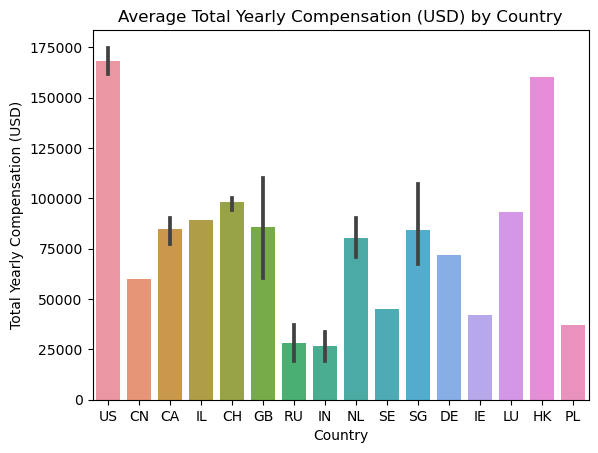

In [18]:
####Part A####

# Plot total yearly compensation by country
sns.barplot(data=ds_salary_data, x='Alpha-2 code', y='totalyearlycompensation')
plt.title('Average Total Yearly Compensation (USD) by Country')
plt.xlabel('Country')
plt.ylabel('Total Yearly Compensation (USD)')

Text(0.5, 0, 'Total Yearly Compensation (USD) (in thousands)')

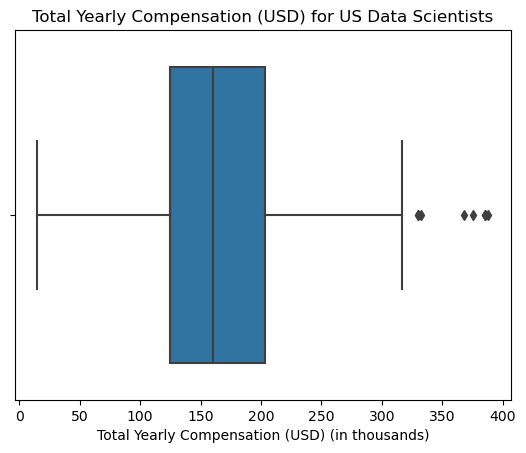

In [19]:
# Plot boxplot for us_ds_salary_data
us_ds_salary_data['formatted salary'] = us_ds_salary_data['totalyearlycompensation'].div(1000)
sns.boxplot(data=us_ds_salary_data, x='formatted salary')
plt.title('Total Yearly Compensation (USD) for US Data Scientists')
plt.xlabel('Total Yearly Compensation (USD) (in thousands)')

Text(0, 0.5, 'Cost of Living Index')

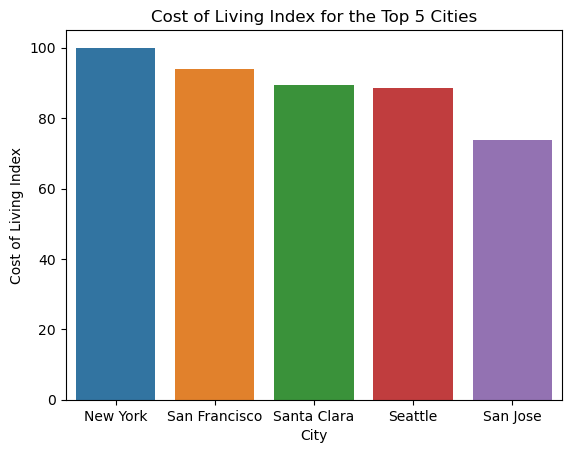

In [20]:
####Part B####
sns.barplot(data=top_5_cities, x='City', y='Cost of Living Index')
plt.title('Cost of Living Index for the Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Cost of Living Index')